In [33]:
from vaex.quick import *
%matplotlib inline
vx.set_log_level_warning()

In [34]:
table = vx.open("/Users/maartenbreddels/vaex/data/tgas/Simu-AGISLab-nominal-shuffled.hdf5")
table.add_virtual_columns_equatorial_to_galactic_cartesian("Alpha", "Delta", "Distance", "x", "y", "z", radians=False)
table.add_virtual_column("rho", "sqrt(x**2+y**2)") # cylindrical radius

In [35]:
table.select("rho > 50.")
subspace = table("x", "y").selected()

In [36]:
xlim, ylim, zlim = table("x", "y", "z").limits_sigma(0.5, square=True)

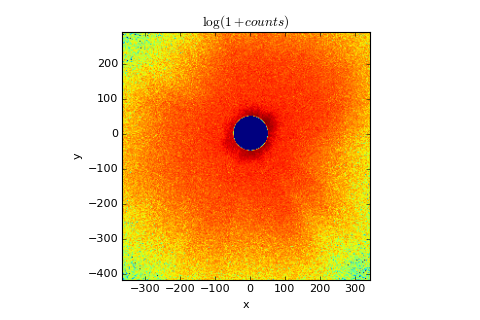

In [37]:
table("x", "y").selected().bounded_by([xlim, ylim]).gridded()

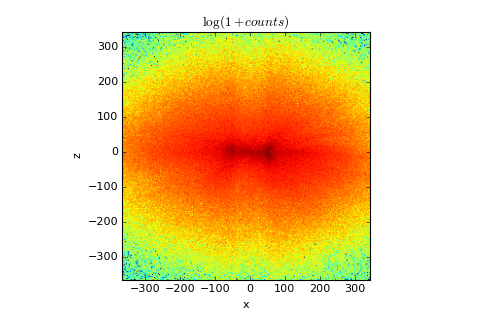

In [38]:
table("x", "z").selected().bounded_by([xlim, zlim]).gridded()

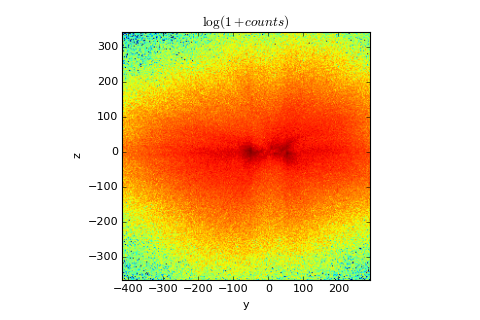

In [39]:
table("y", "z").selected().bounded_by([ylim, zlim]).gridded()

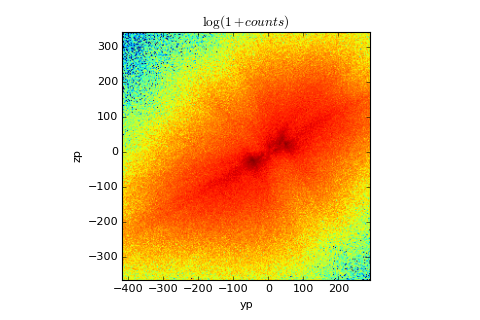

In [40]:
table.add_virtual_columns_rotation("y", "z", "yp", "zp", 30)
table("yp", "zp").selected().bounded_by([ylim, zlim]).gridded()

In [41]:
import vaex.transformations as t
axis = [1, 0, 0]
m = t.rotation_matrix(np.radians(30), axis)
table.add_virtual_columns_matrix3d("x", "y", "z", "x2", "y2", "z2", m, "mat3d")

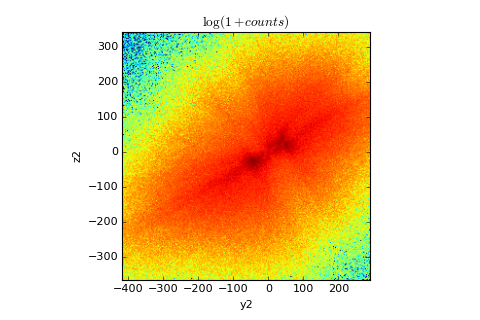

In [42]:
table("y2", "z2").selected().bounded_by([ylim, zlim]).gridded()